# **Sistem Rekomendasi** : **Rekomendasi Film - Content Based Filtering**

Nama : Ma'shum Abdul Jabbar

## **Project Overview**

Seiring dengan pesatnya perkembangan teknologi dan pengumpulan data, data kini dimanfaatkan untuk menciptakan sistem yang lebih efisien, salah satunya melalui **sistem rekomendasi**. Sistem rekomendasi ini berperan penting dalam memberikan pengalaman yang lebih baik kepada pengguna dengan menyarankan item yang relevan berdasarkan preferensi mereka. Salah satu pendekatan yang banyak digunakan dalam sistem rekomendasi adalah **Content-Based Filtering**, yang memanfaatkan informasi yang terkandung dalam item itu sendiri untuk memberikan rekomendasi yang sesuai.

## **Business Understanding**

- **Tujuan utama** sistem rekomendasi adalah untuk membantu pengguna menemukan item yang relevan dan sesuai dengan preferensi mereka.
- **Content-Based Filtering** berfokus pada penggunaan metadata item, seperti genre, deskripsi, aktor, sutradara, dan elemen terkait lainnya untuk menemukan item yang mirip dan memberikan rekomendasi berdasarkan hal tersebut.
- **Prinsip dasar Content-Based Filtering**: Jika pengguna menyukai suatu item, maka sistem akan merekomendasikan item lain yang memiliki kesamaan dengan item tersebut, berdasarkan informasi yang ada pada metadata.
- **Aplikasi dalam film**: Pada konteks film, sistem ini akan menganalisis metadata seperti deskripsi plot, aktor, sutradara, dan kata kunci untuk memberikan rekomendasi film yang serupa dengan yang sudah dinikmati pengguna sebelumnya.
- **Keuntungan bagi bisnis**: Penerapan sistem rekomendasi berbasis konten ini dapat meningkatkan keterlibatan pengguna dengan menyarankan konten yang lebih relevan, meningkatkan kepuasan pengguna, dan mendorong penggunaan yang lebih lama di platform seperti streaming film dan musik.

## **Data Understanding**

### **Library**

Perintah berikut digunakan untuk menginstal `kaggle` API, yang memungkinkan pengguna untuk mengakses dan mengelola dataset dari platform Kaggle secara langsung melalui terminal atau script Python.

In [ ]:
!pip install kaggle

Pada kode ini, berbagai pustaka penting diimpor untuk membantu dalam proses analisis data, pemrosesan teks, dan evaluasi model:

1. **Pandas** dan **NumPy**:
   - Digunakan untuk manipulasi dan analisis data dalam format tabel dan array. Pandas sangat berguna dalam mengelola dataset besar, sedangkan NumPy menyediakan fungsionalitas untuk perhitungan numerik yang efisien.

2. **JSON**:
   - Digunakan untuk memproses data dalam format JSON, yang sering digunakan dalam pengambilan data dari API atau sumber data eksternal.

3. **Matplotlib dan Seaborn**:
   - Kedua pustaka ini digunakan untuk membuat visualisasi data. Matplotlib memungkinkan pembuatan plot dan grafik yang fleksibel, sementara Seaborn memperkaya visualisasi dengan tampilan yang lebih informatif dan estetik, serta mendukung pembuatan grafik statistik dengan lebih mudah.

4. **TfidfVectorizer**:
   - Dari pustaka `sklearn.feature_extraction.text`, ini digunakan untuk mengubah teks (misalnya, deskripsi film) menjadi representasi vektor numerik. TF-IDF (Term Frequency-Inverse Document Frequency) adalah teknik yang digunakan untuk menilai pentingnya sebuah kata dalam sebuah dokumen relatif terhadap koleksi dokumen lainnya. Ini sangat berguna dalam aplikasi sistem rekomendasi berbasis konten.

5. **Cosine Similarity**:
   - Fungsi dari `sklearn.metrics.pairwise` ini digunakan untuk mengukur kemiripan antara dua vektor numerik. Pada konteks ini, digunakan untuk menghitung kemiripan antara deskripsi film yang diproses dengan TF-IDF, membantu dalam menemukan film yang mirip.

6. **IPython Display**:
   - `IPython.display` digunakan untuk menampilkan data secara langsung dalam lingkungan notebook seperti Jupyter Notebook, yang sangat berguna untuk visualisasi data dan hasil yang mudah dipahami.

7. **Precision, Recall, F1-Score**:
   - Ketiga metrik ini digunakan untuk mengevaluasi kinerja sistem rekomendasi. Precision mengukur akurasi hasil yang direkomendasikan, recall mengukur seberapa banyak relevansi yang ditemukan, dan F1-Score memberikan gambaran keseimbangan antara precision dan recall.

Secara keseluruhan, kode ini menyiapkan berbagai alat yang diperlukan untuk membangun dan mengevaluasi model rekomendasi berbasis konten menggunakan teknik TF-IDF dan kemiripan kosinus untuk menganalisis dan merekomendasikan film.

In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display
from sklearn.metrics import precision_score, recall_score, f1_score
from collections import Counter

### **Dataset**

Sumber Data :
*   https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata



Untuk mengunduh dataset dari Kaggle, khususnya dataset yang berkaitan dengan metadata film dari TMDB (The Movie Database), kita akan jalankan perintah berikut:

- **`!kaggle`**: Perintah ini menjalankan perintah dari Kaggle CLI di dalam lingkungan notebook atau terminal.
- **`datasets download`**: Opsi ini menginstruksikan Kaggle untuk mengunduh dataset.
- **`-d tmdb/tmdb-movie-metadata`**: Parameter ini menunjuk pada dataset yang spesifik yang ingin diunduh, dalam hal ini adalah dataset metadata film dari TMDB.

In [ ]:
!kaggle datasets download -d tmdb/tmdb-movie-metadata

Dataset URL: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata
License(s): other
 90% 8.00M/8.89M [00:01<00:00, 12.9MB/s]
100% 8.89M/8.89M [00:01<00:00, 8.51MB/s]


Berikutnya kita akan mengekstrak file ZIP yang telah diunduh sebelumnya.

- **`!unzip`**: Perintah ini digunakan untuk mengekstrak file ZIP dalam lingkungan notebook atau terminal.
- **`tmdb-movie-metadata.zip`**: Nama file ZIP yang akan diekstrak. File ini berisi dataset yang diunduh dari Kaggle.

Setelah perintah ini dijalankan, konten file ZIP akan diekstrak dan dapat diakses secara langsung dalam bentuk file CSV yang dapat digunakan untuk analisis lebih lanjut.

In [ ]:
!unzip tmdb-movie-metadata.zip

Archive:  tmdb-movie-metadata.zip
  inflating: tmdb_5000_credits.csv   
  inflating: tmdb_5000_movies.csv    


In [ ]:
data_tmdb_credits=pd.read_csv('/content/tmdb_5000_credits.csv')
data_tmdb_movies=pd.read_csv('/content/tmdb_5000_movies.csv')

Perintah `!unzip` telah mengekstrak dua file CSV berikut:

- **`tmdb_5000_credits.csv`**: Berisi informasi terkait dengan kredit film, termasuk data pemeran dan kru yang terlibat dalam pembuatan film.
- **`tmdb_5000_movies.csv`**: Berisi metadata tentang film, seperti judul, tahun rilis, genre, dan informasi terkait lainnya.

Kemudian, kedua file CSV tersebut dibaca ke dalam DataFrame menggunakan **`pandas`** dan disimpan ke dalam variabel **`data_tmdb_credits`** dan **`data_tmdb_movies`**.

### **Exploratory Data Analysis**

Berikutnya kita akan memperoleh informasi mengenai DataFrame **`data_tmdb_credits`** yang berisi data kredit film. Berikut adalah hasil output yang diperoleh:

- **Jumlah Baris dan Kolom**: DataFrame ini memiliki **4803 baris** (entry) dan **4 kolom**.
- **Kolom**:
  - **`movie_id`**: Kolom ini berisi ID unik untuk setiap film, dengan tipe data `int64`. Kolom ini memiliki **4803 nilai non-null**.
  - **`title`**: Kolom ini berisi judul film dengan tipe data `object` (string). Kolom ini juga memiliki **4803 nilai non-null**.
  - **`cast`**: Kolom ini berisi data mengenai aktor atau pemeran film dalam format string, dan memiliki **4803 nilai non-null**.
  - **`crew`**: Kolom ini berisi data mengenai kru film (seperti sutradara, penulis, dsb.) dalam format string, dan juga memiliki **4803 nilai non-null**.

- **Tipe Data**:
  - **`movie_id`** bertipe **`int64`**, sedangkan kolom lainnya (`title`, `cast`, dan `crew`) bertipe **`object`**, yang berarti mereka berisi data teks (string).
  
- **Penggunaan Memori**: DataFrame ini memerlukan **150.2 KB** memori untuk menyimpan data tersebut.

Output ini memberikan gambaran awal mengenai struktur data di dalam **`data_tmdb_credits`**, yang akan membantu dalam tahap eksplorasi dan analisis data lebih lanjut.

In [ ]:
data_tmdb_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


Fungsi `head()`  berguna untuk memeriksa bagian awal dari dataset dan memberikan gambaran awal mengenai isi kolom-kolom yang ada, serta memungkinkan kita untuk memverifikasi data dan memastikan bahwa dataset yang digunakan sudah sesuai dengan ekspektasi.


In [ ]:
data_tmdb_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Output dari perintah `data_tmdb_credits.head()` menunjukkan **5 baris pertama** dari dataset **`data_tmdb_credits`** yang memuat informasi mengenai **ID film**, **judul film**, **cast (pemeran)**, dan **crew (kru)**. Setiap baris berisi data terkait film dengan struktur sebagai berikut:

- **`movie_id`**: Merupakan ID unik yang mengidentifikasi setiap film dalam dataset.
- **`title`**: Merupakan judul film tersebut.
- **`cast`**: Berisi informasi mengenai pemeran dalam format JSON yang mencakup ID pemeran, karakter yang diperankan, serta nama pemeran.
- **`crew`**: Berisi informasi mengenai kru film, termasuk peran mereka dalam produksi (seperti sutradara, penulis, dll.), serta profil mereka dalam format JSON.

Perintah `data_tmdb_movies.info()` digunakan untuk memberikan informasi dasar mengenai struktur dan tipe data dalam **dataset `data_tmdb_movies`** yang berisi informasi terkait film. Berdasarkan hasil perintah ini, dataset memiliki **4803 entri** dan **20 kolom** dengan tipe data yang bervariasi, termasuk integer, float, dan objek (string). Berikut adalah penjelasan kolom-kolom yang ada:

- **`budget`**: Budget film dalam format integer.
- **`genres`**: Jenis atau kategori film dalam format objek (string).
- **`homepage`**: URL halaman resmi film (beberapa nilai null).
- **`id`**: ID unik untuk setiap film dalam format integer.
- **`keywords`**: Kata kunci terkait film dalam format objek (string).
- **`original_language`**: Bahasa asli film (misalnya, "en" untuk bahasa Inggris).
- **`original_title`**: Judul asli film.
- **`overview`**: Ringkasan atau deskripsi singkat film, dengan beberapa nilai null.
- **`popularity`**: Popularitas film dalam format float.
- **`production_companies`**: Perusahaan produksi yang terlibat dalam film.
- **`production_countries`**: Negara produksi film.
- **`release_date`**: Tanggal rilis film (dengan beberapa nilai null).
- **`revenue`**: Pendapatan film dalam format integer.
- **`runtime`**: Durasi film dalam menit, beberapa nilai null.
- **`spoken_languages`**: Bahasa yang digunakan dalam film.
- **`status`**: Status film (misalnya, "Released").
- **`tagline`**: Tagline film yang digunakan untuk promosi, dengan beberapa nilai null.
- **`title`**: Judul film.
- **`vote_average`**: Rata-rata rating yang diberikan oleh penonton.
- **`vote_count`**: Jumlah vote atau ulasan yang diberikan.

In [ ]:
data_tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

Beberapa kolom seperti **`homepage`**, **`release_date`**, **`runtime`**, dan **`tagline`** memiliki nilai **null**, yang mengindikasikan bahwa data tidak tersedia untuk semua entri. Meskipun demikian, dataset ini cukup lengkap dan dapat digunakan untuk analisis lebih lanjut terkait karakteristik film, seperti genre, anggaran, pendapatan, dan rating penonton.

Output ini memberikan gambaran mengenai kolom-kolom penting yang bisa digunakan dalam analisis atau rekomendasi film berbasis data ini.

In [ ]:
data_tmdb_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Perintah `data_tmdb_movies.head()` digunakan untuk menampilkan **5 baris pertama** dari dataset **`data_tmdb_movies`**, yang memberikan gambaran umum mengenai data yang ada. Berikut adalah kolom-kolom yang terdapat dalam dataset tersebut:

- **`budget`**: Anggaran film, yang berupa angka dalam satuan mata uang (misalnya, 237000000 untuk film *Avatar*).
- **`genres`**: Jenis-jenis film yang terkait, dalam format list yang berisi objek dengan informasi ID dan nama genre (misalnya, "Action", "Adventure").
- **`homepage`**: URL halaman resmi film, jika ada, yang sering digunakan untuk promosi film.
- **`id`**: ID unik film dalam dataset.
- **`keywords`**: Kata kunci yang berkaitan dengan film dalam format list objek.
- **`original_language`**: Bahasa asli film (misalnya, *en* untuk bahasa Inggris).
- **`original_title`**: Judul asli film.
- **`overview`**: Ringkasan atau deskripsi film yang memberikan informasi umum tentang plot atau tema film.
- **`popularity`**: Skor popularitas film berdasarkan metrik yang dihitung oleh platform.
- **`production_companies`**: Perusahaan-perusahaan produksi yang terlibat dalam pembuatan film.
- **`production_countries`**: Negara-negara yang terlibat dalam produksi film.
- **`release_date`**: Tanggal rilis film.
- **`revenue`**: Pendapatan film yang diperoleh dari penayangan di bioskop.
- **`runtime`**: Durasi film dalam menit.
- **`spoken_languages`**: Bahasa yang digunakan dalam film.
- **`status`**: Status film (misalnya, "Released").
- **`tagline`**: Tagline promosi film, seperti slogan singkat yang digunakan untuk menarik perhatian penonton.
- **`title`**: Judul film dalam format teks.
- **`vote_average`**: Rata-rata rating yang diberikan oleh penonton film.
- **`vote_count`**: Jumlah suara yang diberikan oleh penonton.

Hasil yang ditampilkan memberikan informasi tentang beberapa film, seperti *Avatar*, *Pirates of the Caribbean: At World's End*, dan *Spectre*, dengan berbagai detail tentang genre, anggaran, kata kunci, dan pendapatan mereka. Data ini akan digunakan untuk analisis lebih lanjut atau membangun model rekomendasi berbasis film.

### **Menampilkan Genre Film**

Berikut untuk mendapatkan daftar genre unik dari kolom `genres` yang berisi data dalam format JSON.

In [ ]:
all_genres = data_tmdb_movies['genres'].apply(
    lambda x: [genre['name'] for genre in json.loads(x)]
)

flattened_genres = [genre for sublist in all_genres for genre in sublist]

unique_genres = sorted(set(flattened_genres))

print(unique_genres)

['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']


In [ ]:
len(unique_genres)

20

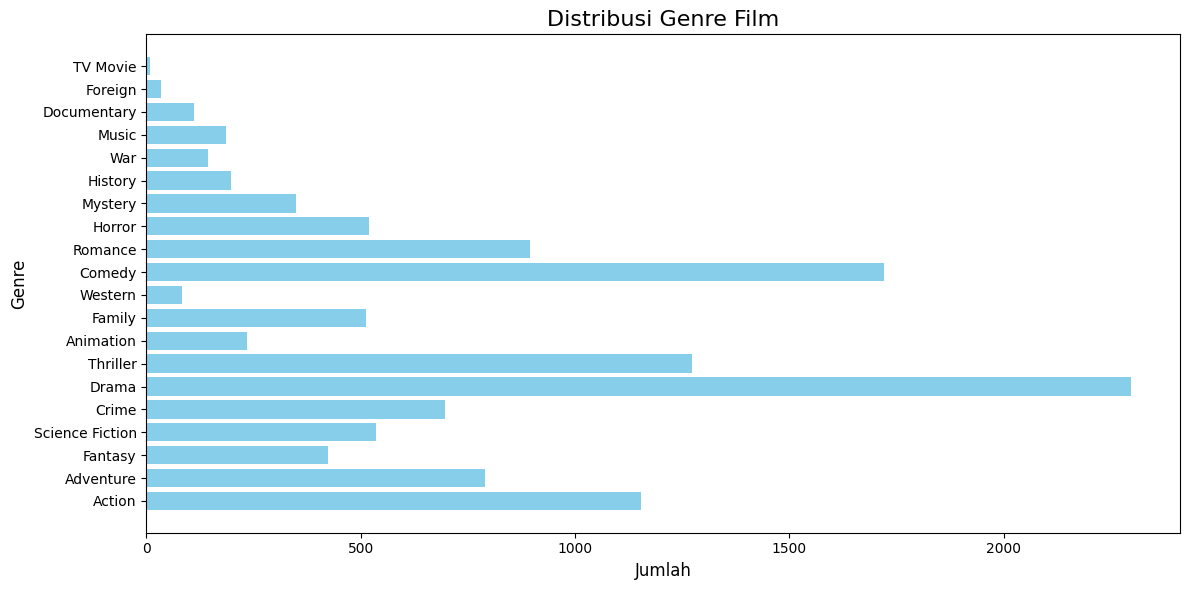

In [ ]:
genre_counts = Counter(flattened_genres)
genres = list(genre_counts.keys())
counts = list(genre_counts.values())
plt.figure(figsize=(12, 6))
plt.barh(genres, counts, color='skyblue')
plt.xlabel('Jumlah', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.title('Distribusi Genre Film', fontsize=16)
plt.tight_layout()
plt.show()

Terlihat ada 20 Genre unik pada Database Movie.

### **Menampilkan Informasi Nama dan Jumlah Aktor**

Selanjutnya kita coba mengumpulkan dan menyusun daftar **nama aktor** yang muncul dalam dataset **`data_tmdb_credits`** dengan tujuan untuk melihat daftar aktor dan jumlah aktor unik. Berikut adalah langkah-langkah yang dilakukan dalam kode tersebut:

1. **Membuat set kosong `actor_names`**:
   - Set digunakan untuk menyimpan nama-nama aktor secara unik, karena set secara otomatis menghindari duplikasi.

2. **Iterasi melalui kolom `cast`**:
   - Data dalam kolom `cast` berupa string yang mewakili list objek yang berisi informasi aktor. Setiap string kemudian diubah menjadi objek Python menggunakan `json.loads()`.

3. **Menambahkan nama aktor ke dalam set**:
   - Untuk setiap aktor dalam `cast_data`, nama aktor diambil dan dibersihkan (menghapus spasi berlebih dan karakter khusus seperti tanda kutip) sebelum dimasukkan ke dalam set `actor_names`.

4. **Menyortir nama aktor**:
   - Setelah semua nama aktor dikumpulkan, nama-nama tersebut diurutkan secara alfabetik menggunakan `sorted()`.

5. **Menampilkan hasil**:
   - Daftar nama aktor yang telah disortir ditampilkan dengan menggunakan `print()`.

Dengan cara ini, kita dapat memperoleh **daftar unik nama aktor** yang terlibat dalam berbagai film di dataset tersebut. Daftar aktor ini dapat digunakan untuk analisis lebih lanjut atau dalam pembuatan rekomendasi film berbasis aktor.

In [ ]:
actor_names = set()

for cast in data_tmdb_credits.cast:
    cast_data = json.loads(cast)
    for actor in cast_data:
        cleaned_name = actor['name'].strip().replace('"', '').replace("'", "")
        actor_names.add(cleaned_name)

sorted_actor_names = sorted(actor_names)
print('Daftar Nama Aktor: ', sorted_actor_names)

Daftar Nama Aktor:  ['50 Cent', 'A. David Burleigh', 'A. Frank Ruffo', 'A. J. Benza', 'A. J. Langer', 'A. Jay Radcliff', 'A. Michael Baldwin', 'A. Russell Andrews', 'A.C. Green', 'A.D. Johnson', 'A.D. Miles', 'A.J. Adelman', 'A.J. Balance', 'A.J. Benza', 'A.J. Buckley', 'A.J. Cook', 'A.J. DeLucia', 'A.J. Johnson', 'A.J. McLean', 'A.J. Riebli III', 'A.J. Sexton', 'A.J. Tecce', 'A.J. Verel', 'A.S. Byron', 'A.k. Steppa', 'AJ Bowen', 'AJ Diana', 'AJ Meijer', 'AJ Michalka', 'Aadukalam Naren', 'Aakomon Jones', 'Aaliyah', 'Aamir Khan', 'Aaran Thomas', 'Aaron Abrams', 'Aaron Ashmore', 'Aaron Au', 'Aaron Berg', 'Aaron Brown', 'Aaron Brumfield', 'Aaron Burns', 'Aaron Carter', 'Aaron Cohen', 'Aaron Colom', 'Aaron Cortesi', 'Aaron Covington', 'Aaron Craven', 'Aaron D. Spears', 'Aaron Denkel', 'Aaron Deuce Cooke', 'Aaron Dillar', 'Aaron Douglas', 'Aaron Eckhart', 'Aaron Egawa', 'Aaron Fors', 'Aaron Frazier', 'Aaron Glaser', 'Aaron Hayes', 'Aaron Hendry', 'Aaron Himelstein', 'Aaron Hotch', 'Aaron Hu

In [ ]:
print('Jumlah Aktor : ', len(actor_names))

Jumlah Aktor :  54198


### **Menampilkan 10 Aktor dengan film terbanyak**

Perintah yang diberikan bertujuan untuk **menampilkan 10 aktor dengan jumlah film terbanyak** berdasarkan data yang ada dalam dataset **`data_tmdb_credits`**. Berikut adalah penjelasan langkah-langkah dalam kode tersebut:

1. **Menyiapkan list `actor_names`**:
   - List kosong `actor_names` disiapkan untuk menampung nama-nama aktor dari seluruh film yang ada dalam dataset.

2. **Iterasi melalui kolom `cast`**:
   - Kolom `cast` berisi string yang mewakili list objek berisi informasi aktor. Setiap string ini diubah menjadi objek Python dengan menggunakan `json.loads()`.

3. **Menambahkan nama aktor ke dalam list**:
   - Untuk setiap objek aktor dalam data `cast_data`, nama aktor diambil dan dibersihkan (menghapus tanda kutip dan spasi berlebih) sebelum dimasukkan ke dalam list `actor_names`.

4. **Menghitung jumlah kemunculan setiap aktor**:
   - Menggunakan `pd.Series(actor_names).value_counts()` untuk menghitung jumlah kemunculan setiap aktor dalam list `actor_names`. Hasilnya diambil 10 teratas dengan menggunakan `.head(10)`.

5. **Visualisasi dengan bar chart**:
   - Menggunakan `matplotlib.pyplot` untuk membuat grafik batang (`bar chart`). Ukuran grafik diatur dengan `figsize=(10, 6)` dan warna batang diatur dengan `color='skyblue'`.
   - Judul, label sumbu X dan Y, serta rotasi label sumbu X diatur untuk membuat grafik lebih informatif dan mudah dibaca.

6. **Menampilkan grafik**:
   - `plt.show()` digunakan untuk menampilkan grafik yang menggambarkan **top 10 aktor dengan film terbanyak**.

Dengan cara ini, kita dapat memperoleh visualisasi yang jelas tentang aktor-aktor yang paling sering muncul dalam dataset film TMDB berdasarkan jumlah film yang mereka perankan.

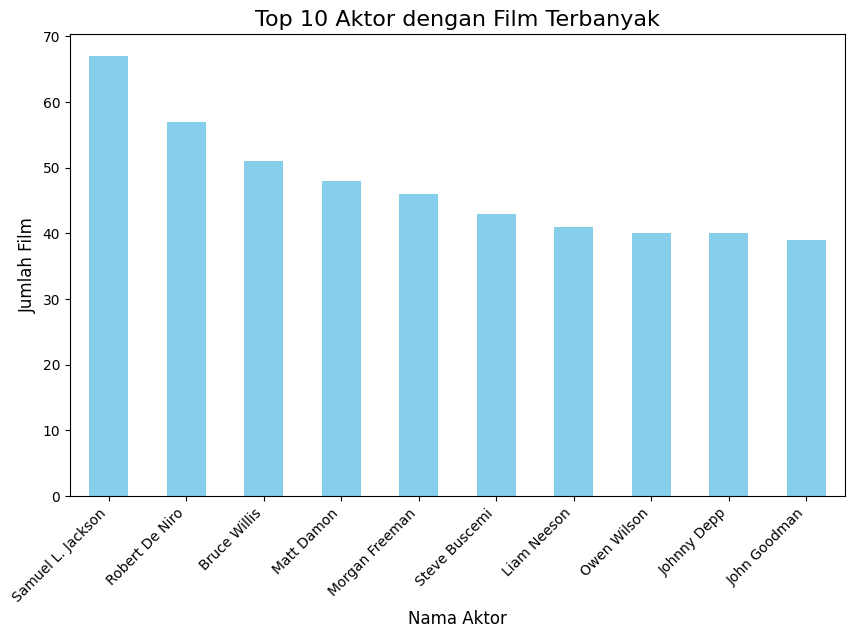

In [ ]:
actor_names = []

for cast in data_tmdb_credits['cast']:
    cast_data = json.loads(cast)
    for actor in cast_data:
        actor_names.append(actor['name'].strip().replace('"', '').replace("'", ""))

actor_counts = pd.Series(actor_names).value_counts().head(10)

plt.figure(figsize=(10, 6))
actor_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Aktor dengan Film Terbanyak', fontsize=16)
plt.xlabel('Nama Aktor', fontsize=12)
plt.ylabel('Jumlah Film', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

Dari visualisasi tersebut, terlihat bahwa Samuel L. Jackson merupakan Aktor yang memiliki film paling banyak pada Database TMDB.

### **Menampilkan 10 film dengan rating tertinggi**

Perintah berikut bertujuan untuk **menampilkan 10 film teratas berdasarkan rata-rata nilai suara (vote average)**, menggunakan data dari dataset **`data_tmdb_movies`**. Berikut adalah penjelasan langkah-langkah dalam kode tersebut:

1. **Menyortir film berdasarkan `vote_average`**:
   - Data diurutkan menggunakan `sort_values()` dengan kolom `vote_average` sebagai parameter pengurutan. Hasilnya diurutkan secara menurun (`ascending=False`) untuk mendapatkan film dengan nilai rata-rata suara tertinggi.
   - Setelah itu, menggunakan `head(10)` untuk mengambil 10 film teratas berdasarkan pengurutan ini.

2. **Visualisasi dengan bar plot**:
   - Menggunakan `seaborn.barplot()` untuk membuat bar plot. Pada sumbu X akan diwakili oleh kolom `vote_average` yang menunjukkan rata-rata nilai suara, dan pada sumbu Y diwakili oleh kolom `title` yang menunjukkan judul film.
   - Palette `viridis` digunakan untuk warna batang agar tampak lebih menarik dan sesuai dengan tema grafik.

3. **Penambahan label dan judul**:
   - Label untuk sumbu X dan Y ditambahkan untuk memberikan konteks pada grafik, yakni "Rating (Vote Average)" untuk sumbu X dan "Movie Title" untuk sumbu Y.
   - Judul grafik adalah "Top 10 Movies with the Highest Vote Average" untuk menjelaskan fokus grafik ini.

4. **Pengaturan layout dan tampilan**:
   - `plt.tight_layout()` digunakan untuk memastikan bahwa layout grafik tidak saling bertumpuk dan ruang antara elemen-elemen grafik diatur dengan baik.
   - `plt.show()` digunakan untuk menampilkan grafik yang sudah disiapkan.

Dengan cara ini, kita dapat melihat **10 film dengan rata-rata nilai suara tertinggi** dalam dataset TMDB, yang memberikan gambaran tentang film-film yang paling disukai menurut pemilih.

<ipython-input-15-df7435bfd47f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='vote_average', y='title', data=top_10_movies, palette='viridis')


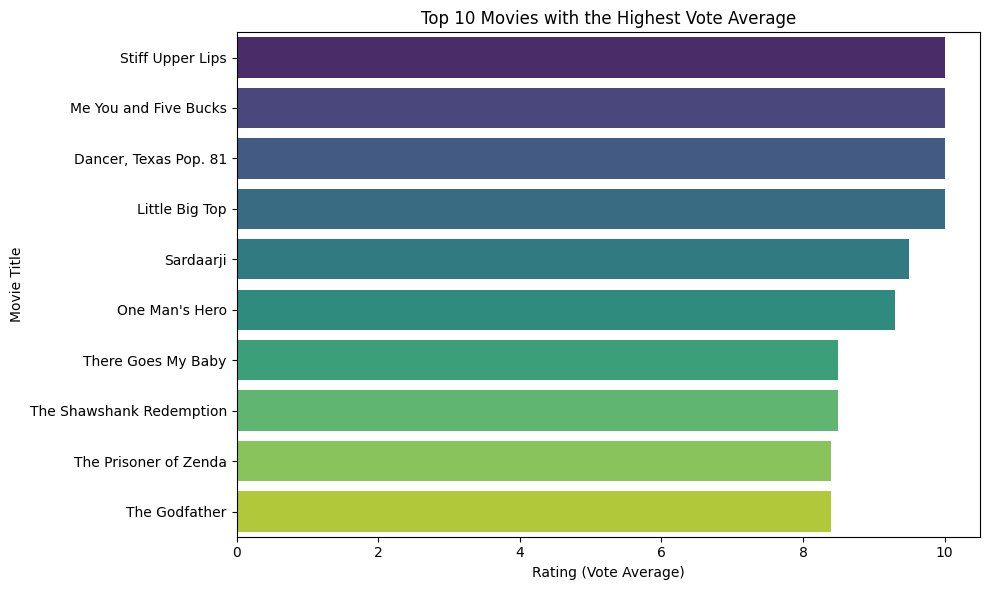

In [ ]:
top_10_movies = data_tmdb_movies.sort_values(by='vote_average', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='vote_average', y='title', data=top_10_movies, palette='viridis')

plt.xlabel('Rating (Vote Average)')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies with the Highest Vote Average')

plt.tight_layout()
plt.show()

## **Data Preparation**

### **Penggabungan Dataset**

Pada langkah ini, kita melakukan **penggabungan dataset** antara informasi film yang ada pada dataset `data_tmdb_movies` dan data aktor serta kru pada dataset `data_tmdb_credits`. Penggabungan ini dilakukan berdasarkan **ID film**, yang terdapat pada kolom `id` di `data_tmdb_movies` dan kolom `movie_id` di `data_tmdb_credits`.

Metode yang digunakan untuk penggabungan ini adalah fungsi `pd.merge()`. Fungsi ini akan menggabungkan kedua DataFrame berdasarkan kolom yang sesuai, sehingga informasi terkait film (seperti genre, overview, dan lainnya) dan informasi terkait cast serta crew akan digabungkan menjadi satu baris per film.

In [ ]:
data_tmdb = pd.merge(data_tmdb_movies, data_tmdb_credits, left_on='id', right_on='movie_id')

Setelah menggabungkan dataset `data_tmdb_movies` dan `data_tmdb_credits`, kita dapat melihat struktur dan informasi umum dari DataFrame yang dihasilkan dengan menggunakan fungsi `data_tmdb.info()`. Fungsi ini memberikan gambaran tentang jumlah entri (baris) dalam dataset, serta jumlah data yang hilang (null values) pada setiap kolom.

Berikut adalah informasi yang diperoleh setelah penggabungan dataset:

- **Jumlah total entri (baris)**: Terdapat 4803 entri, yang berarti kita memiliki data untuk 4803 film.
- **Jumlah kolom**: Ada 24 kolom, yang mencakup informasi seperti `budget`, `genres`, `release_date`, `overview`, `cast`, `crew`, dan banyak lagi.
- **Tipe data**: Dataset ini memiliki berbagai tipe data, termasuk `int64`, `float64`, dan `object` (untuk teks). Beberapa kolom memiliki nilai kosong (null), seperti kolom `homepage`, `overview`, `release_date`, dan `tagline`.


In [ ]:
data_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

### **Mengatasi Missing Value**

Pada langkah ini, kita mengatasi missing values (nilai yang hilang) dalam dataset dengan cara yang sesuai untuk setiap kolom yang memiliki data kosong:

1. **Kolom `runtime`**:
   - Nilai yang hilang pada kolom `runtime` diisi dengan **median** dari kolom tersebut. Median dipilih karena dapat mengurangi pengaruh nilai ekstrem atau outliers pada data numerik.

2. **Kolom `homepage`**:
   - Kolom `homepage`, yang berisi URL halaman film, diisi dengan string kosong (`''`) pada entri yang kosong. Hal ini menandakan bahwa tidak ada homepage yang tersedia untuk film tersebut.

3. **Kolom `overview`**:
   - Kolom `overview`, yang berisi deskripsi singkat tentang film, diisi dengan nilai dari kolom `title_x` (judul film) jika ada nilai yang kosong. Ini membantu menghindari missing values dan memberikan informasi terkait film.

4. **Kolom `tagline`**:
   - Kolom `tagline`, yang berisi slogan atau tagline film, diisi dengan nilai dari kolom `title_x` jika ada missing value. Ini memberikan pengganti yang relevan meskipun tidak secara langsung menggambarkan tagline.

5. **Kolom `release_date`**:
   - Kolom `release_date`, yang berisi tanggal rilis film, diisi dengan metode **forward fill** (`ffill`), di mana nilai kosong diisi dengan nilai dari baris sebelumnya. Metode ini berguna jika entri kosong terjadi berturut-turut dan tanggal rilis film baru tidak terlalu jauh berbeda dengan sebelumnya.

Dengan melakukan pengisian nilai kosong ini, dataset menjadi lebih konsisten dan siap untuk diproses lebih lanjut.

In [ ]:
data_tmdb['runtime'] = data_tmdb['runtime'].fillna(data_tmdb['runtime'].median())
data_tmdb['homepage'] = data_tmdb['homepage'].fillna('')
data_tmdb['overview'] = data_tmdb['overview'].fillna(data_tmdb['title_x'])
data_tmdb['tagline'] = data_tmdb['tagline'].fillna(data_tmdb['title_x'])
data_tmdb['release_date'] = data_tmdb['release_date'].ffill()

### **Mengatasi Duplikat Kolom**

Pada langkah ini, kita menangani masalah **duplikat kolom** yang terjadi pada data setelah proses penggabungan (merge) antara `data_tmdb_movies` dan `data_tmdb_credits`. Dalam dataset yang digabungkan, terdapat dua kolom dengan nama yang hampir sama, yaitu `title_x` dan `title_y`, yang mungkin mengandung perbedaan nilai.

1. **Mengecek perbedaan antara `title_x` dan `title_y`**:
   - Untuk mengetahui apakah terdapat perbedaan antara dua kolom tersebut, kita melakukan perbandingan dengan kondisi `data_tmdb['title_x'] != data_tmdb['title_y']`. Jika ada baris yang memiliki nilai berbeda antara `title_x` dan `title_y`, kita dapat mendeteksi perbedaannya.

2. **Menampilkan jumlah perbedaan**:
   - Hasil dari perbandingan ini kemudian dihitung menggunakan fungsi `len(title_difference)` untuk mengetahui jumlah baris yang memiliki perbedaan antara kedua kolom tersebut.

3. **Menampilkan perbedaan**:
   - Jika ada perbedaan, informasi perbedaan judul ditampilkan dengan mencetak dua kolom tersebut (`title_x` dan `title_y`) untuk melihat perbedaan yang ada pada dataset.

Langkah ini penting untuk memastikan bahwa tidak ada data yang tumpang tindih atau tidak konsisten dalam hal nama judul film setelah penggabungan, sehingga kita dapat memutuskan bagaimana cara terbaik untuk mengelola kolom yang duplikat.

In [ ]:
title_difference = data_tmdb[data_tmdb['title_x'] != data_tmdb['title_y']]
print("Jumlah baris dengan perbedaan title:", len(title_difference))

if not title_difference.empty:
    print(title_difference[['title_x', 'title_y']])

Jumlah baris dengan perbedaan title: 0


Pada langkah ini, kita mengatasi masalah **duplikat kolom** yang sebelumnya ditemukan pada dataset setelah penggabungan data. Dua kolom yang memiliki nama hampir sama, yaitu `title_x` dan `title_y`, kini perlu diselesaikan dengan memilih satu kolom yang akan digunakan sebagai kolom utama untuk judul film.

1. **Memilih kolom `title_x` sebagai kolom utama**:
   - Dalam langkah pertama, kolom `title_x` dipilih sebagai kolom utama untuk judul film. Ini dilakukan dengan mengassign nilai dari `title_x` ke kolom `title` yang baru, menggunakan sintaks `data_tmdb['title'] = data_tmdb['title_x']`.
   - Dengan cara ini, kita menyatukan informasi judul film yang benar dari kedua kolom tersebut, memastikan konsistensi di seluruh dataset.

2. **Menghapus kolom duplikat (`title_x` dan `title_y`)**:
   - Setelah memilih kolom yang benar, langkah selanjutnya adalah menghapus kedua kolom yang sudah tidak diperlukan, yaitu `title_x` dan `title_y`. Hal ini dilakukan dengan menggunakan perintah `data_tmdb.drop(columns=['title_x', 'title_y'])`.
   - Penghapusan kolom ini bertujuan untuk merapikan dataset dan menghindari redundansi kolom yang dapat membingungkan analisis atau proses selanjutnya.

Langkah ini penting untuk menyederhanakan dataset dan memastikan bahwa hanya ada satu kolom yang berisi informasi judul film yang konsisten.

In [ ]:
data_tmdb['title'] = data_tmdb['title_x']
data_tmdb = data_tmdb.drop(columns=['title_x', 'title_y'])

Langkah berikutnya adalah **membandingkan kolom `id` dan `movie_id`**, serta memastikan konsistensi antara kedua kolom tersebut. Kolom `id` yang berasal dari dataset `data_tmdb_movies` dan kolom `movie_id` yang berasal dari dataset `data_tmdb_credits` mungkin saja berisi informasi yang serupa atau identik, namun perlu dipastikan bahwa kedua kolom ini sesuai.

1. **Membandingkan Kolom `id` dan `movie_id`**:
   - Langkah pertama adalah membandingkan nilai yang ada pada kolom `id` dan `movie_id` untuk memastikan bahwa keduanya menyimpan informasi yang konsisten dan tidak ada perbedaan.

2. **Menghapus Kolom yang Tidak Diperlukan**:
   - Setelah memastikan bahwa kedua kolom tersebut memang berfungsi untuk tujuan yang sama, kita memilih salah satu kolom untuk dipertahankan dan menghapus kolom yang duplikat.
   - Biasanya, kolom `id` yang lebih relevan akan dipertahankan, sedangkan kolom `movie_id` dihapus.
   - Penghapusan kolom `movie_id` bertujuan untuk merapikan dataset dan memastikan tidak ada kolom yang redundan.

Langkah-langkah ini membantu memastikan bahwa dataset tidak mengandung duplikat kolom yang bisa membingungkan dalam analisis atau pemrosesan data selanjutnya.

In [ ]:
id_difference = data_tmdb[data_tmdb['id'] != data_tmdb['movie_id']]
print("Jumlah baris dengan perbedaan id:", len(id_difference))
if not id_difference.empty:
    print(id_difference[['id', 'movie_id']])

Jumlah baris dengan perbedaan id: 0


In [ ]:
data_tmdb['id'] = data_tmdb['id']
data_tmdb = data_tmdb.drop(columns=['movie_id'])

### **Memilih Kolom**

Untuk menerapkan **Content-Based Filtering**, kita akan fokus pada kolom-kolom yang relevan yang dapat digunakan untuk menghitung kemiripan antar film berdasarkan kontennya. Kolom-kolom yang akan dipilih adalah `id`, `title`, `overview`, `tagline`, `cast`, dan `genres`. Kolom-kolom ini memberikan informasi penting mengenai film, seperti deskripsi, tagline, pemeran, dan kategori genre, yang semuanya berguna untuk analisis berbasis konten.

   - Langkah pertama adalah memilih kolom yang diperlukan untuk model Content-Based Filtering. Dalam hal ini, kita hanya akan menyertakan kolom `id`, `title`, `overview`, `tagline`, `cast`, dan `genres`.
   - Kita akan membuang kolom-kolom yang tidak diperlukan untuk analisis konten, seperti kolom `budget`, `revenue`, `vote_average`, dll.

In [ ]:
data_tmdb_filtered = data_tmdb[['id', 'title', 'overview', 'tagline', 'cast', 'genres']]

Setelah memilih kolom yang relevan untuk Content-Based Filtering, kita dapat memeriksa struktur DataFrame yang telah difilter menggunakan perintah `info()` pada Pandas.

In [ ]:
data_tmdb_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        4803 non-null   int64 
 1   title     4803 non-null   object
 2   overview  4803 non-null   object
 3   tagline   4803 non-null   object
 4   cast      4803 non-null   object
 5   genres    4803 non-null   object
dtypes: int64(1), object(5)
memory usage: 225.3+ KB


Berikut adalah penjelasan mengenai output yang diperoleh:

1. **Jumlah Entri**:
   - DataFrame memiliki **4803 entri** yang berarti ada 4803 film dalam dataset yang sudah dipilih.

2. **Kolom yang Ada**:
   - Kolom-kolom yang tersedia adalah:
     - `id` (tipe `int64`): ID unik untuk setiap film.
     - `title` (tipe `object`): Judul film.
     - `overview` (tipe `object`): Sinopsis atau deskripsi dari film.
     - `tagline` (tipe `object`): Tagline film, yang biasanya berisi slogan atau pesan singkat.
     - `cast` (tipe `object`): Daftar nama pemeran dalam film tersebut.
     - `genres` (tipe `object`): Daftar genre yang terkait dengan film.

3. **Data Tidak Ada yang Kosong (Non-Null)**:
   - Semua kolom memiliki nilai yang lengkap tanpa nilai kosong (non-null), yang artinya tidak ada data yang hilang dalam dataset setelah langkah pembersihan dilakukan.

4. **Tipe Data**:
   - Sebagian besar kolom memiliki tipe data `object`, yang berarti kolom tersebut berisi teks atau string (seperti `title`, `overview`, `tagline`, `cast`, dan `genres`).
   - Kolom `id` memiliki tipe data `int64`, yang cocok untuk ID numerik yang unik.

Dataset ini siap untuk digunakan dalam langkah-langkah selanjutnya, seperti pemrosesan teks dan perhitungan kemiripan antar film untuk model Content-Based Filtering.

Dalam sistem rekomendasi film ini, konten seperti overview, tagline, cast dan genres digunakan untuk mencari kemiripannya dengan film lainnya.

### **Overview**

Menampilkan 5 data teratas dari kolom overview

In [ ]:
data_tmdb_filtered['overview'].head(5)

,overview
0,"In the 22nd century, a paraplegic Marine is di..."
1,"Captain Barbossa, long believed to be dead, ha..."
2,A cryptic message from Bond’s past sends him o...
3,Following the death of District Attorney Harve...
4,"John Carter is a war-weary, former military ca..."


### **Tagline**

Menampilkan 5 data teratas dari kolom tagline

In [ ]:
data_tmdb_filtered['tagline'].head(5)

,tagline
0,Enter the World of Pandora.
1,"At the end of the world, the adventure begins."
2,A Plan No One Escapes
3,The Legend Ends
4,"Lost in our world, found in another."


### **Cast**

Menampilkan 5 data teratas dari kolom cast

In [ ]:
data_tmdb_filtered['cast'].head(5)

,cast
0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""..."
1,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa..."
2,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr..."
3,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba..."
4,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c..."


### **Genres**

Menampilkan 5 data teratas dari kolom genres

In [ ]:
data_tmdb_filtered['genres'].head(5)

,genres
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."


### **Film yang mengandung keyword tertentu**

Berikut ini kita coba menampilkan daftar film dengan keyword tertentu dengan melihat dari `title`, `overview` dan `tagline`.

In [ ]:
def filter_movies_by_keyword(data, keyword):
    filtered_movies = data[
        data['title'].str.contains(keyword, case=False) |
        data['overview'].str.contains(keyword, case=False) |
        data['tagline'].str.contains(keyword, case=False)
    ]
    return filtered_movies

keyword1 = "The Dark Knight"
filtered_movies_1 = filter_movies_by_keyword(data_tmdb_filtered, keyword1)
print(f"Jumlah film yang mengandung kata '{keyword1}': {len(filtered_movies_1)}")
display(filtered_movies_1[['title']])

keyword2 = "Batman"
filtered_movies_2 = filter_movies_by_keyword(data_tmdb_filtered, keyword2)
print(f"Jumlah film yang mengandung kata '{keyword2}': {len(filtered_movies_2)}")
display(filtered_movies_2[['title']])

Jumlah film yang mengandung kata 'The Dark Knight': 6


,title
3,The Dark Knight Rises
65,The Dark Knight
299,Batman Forever
331,Seventh Son
1359,Batman
3854,"Batman: The Dark Knight Returns, Part 2"


Jumlah film yang mengandung kata 'Batman': 10


,title
3,The Dark Knight Rises
9,Batman v Superman: Dawn of Justice
65,The Dark Knight
119,Batman Begins
210,Batman & Robin
299,Batman Forever
428,Batman Returns
1359,Batman
3854,"Batman: The Dark Knight Returns, Part 2"
4267,Batman


Periksa kenapa Seventh Son muncul :

In [ ]:
pd.set_option('display.max_colwidth', None)
filtered_movies_1[filtered_movies_1['title'] == "Seventh Son"]['tagline']

,tagline
331,"When darkness falls, the son will rise. When the son falls, the dark knight will rise."


Ternyata pada **tagline** film Seven Son terdapat informasi **the dark knight**, namun jika kita menerapkan sistem rekomendasi, diharapkan judul film ini tidak tampil.

### **TF-IDF Vectorizer**

Berikut adalah penjelasan mengenai penggunaan TF-IDF :

1. **TF-IDF untuk Overview dan Tagline**
   - **`TfidfVectorizer`** mengubah teks menjadi representasi numerik berdasarkan bobot TF-IDF.
   - **`stop_words='english'`** menghapus kata-kata umum dalam bahasa Inggris.
   - **`fit_transform()`** digunakan untuk mengonversi teks ke matriks numerik.
   - Menggunakan TF-IDF untuk **overview** dan **tagline** memungkinkan kita untuk mengukur kesamaan antar film berdasarkan deskripsi dan tagline mereka.

2. **TF-IDF untuk Cast**
   - Kolom **`cast`** berisi nama aktor dalam format JSON yang perlu diproses terlebih dahulu.
   - **`json.loads()`** mengonversi data JSON ke dalam objek Python, dan **`' '.join()`** menggabungkan nama-nama aktor menjadi satu string.
   - **`fit_transform()`** digunakan untuk mengonversi teks aktor ke dalam matriks TF-IDF.
   - Ini berguna untuk menemukan kesamaan antar film berdasarkan aktor yang terlibat.

3. **Kolom Parsed Cast**
   - Kolom **`parsed_cast`** berisi daftar nama aktor yang diekstrak dari kolom **`cast`**.
   - **`json.loads()`** digunakan untuk memproses data JSON dan mengekstrak nama aktor.
   - Ini memungkinkan analisis lebih lanjut terkait aktor yang berkolaborasi di berbagai film.

4. **TF-IDF untuk Genres**
   - Kolom **`genres`** juga berisi data dalam format JSON yang perlu diproses.
   - **`json.loads()`** digunakan untuk mengonversi genre ke dalam list, kemudian digabung menjadi satu string.
   - **`fit_transform()`** mengubah teks genre menjadi matriks TF-IDF untuk mengukur kesamaan antar film berdasarkan genre.
   - Genre adalah fitur penting untuk rekomendasi film, karena film dengan genre yang sama cenderung memiliki tema yang serupa.

In [ ]:
tfidf_overview = TfidfVectorizer(stop_words='english')
tfidf_tagline = TfidfVectorizer(stop_words='english')

tfidf_matrix_overview = tfidf_overview.fit_transform(data_tmdb_filtered['overview'])
tfidf_matrix_tagline = tfidf_tagline.fit_transform(data_tmdb_filtered['tagline'])

data_tmdb_filtered.loc[:, 'cast_text'] = data_tmdb_filtered['cast'].apply(
    lambda x: ' '.join([actor['name'] for actor in json.loads(x)])
)

data_tmdb_filtered.loc[:, 'genres_text'] = data_tmdb_filtered['genres'].apply(
    lambda x: ' '.join([genre['name'] for genre in json.loads(x)])
)

tfidf_cast = TfidfVectorizer(stop_words='english')
tfidf_matrix_cast = tfidf_cast.fit_transform(data_tmdb_filtered['cast_text'])

tfidf_genres = TfidfVectorizer(stop_words='english')
tfidf_matrix_genres = tfidf_genres.fit_transform(data_tmdb_filtered['genres_text'])

**Kesimpulan**
- Dengan menggunakan **TF-IDF Vectorizer** pada kolom **overview**, **tagline**, **cast**, dan **genres**, kita dapat mengubah data teks menjadi representasi numerik yang dapat digunakan dalam model rekomendasi berbasis konten.
- Teknik ini memanfaatkan informasi penting dalam teks untuk mengukur kesamaan antara film, memungkinkan kita untuk memberikan rekomendasi film berdasarkan deskripsi, aktor, dan genre mereka.
- **TF-IDF** adalah pilihan yang tepat karena mampu memberikan bobot yang lebih tinggi pada kata-kata yang jarang ditemukan di seluruh dataset, tetapi muncul secara signifikan dalam satu dokumen, membantu kita untuk menemukan fitur-fitur yang lebih unik dan relevan untuk rekomendasi film.

Lihat ukuran dari setiap matrix

In [ ]:
tfidf_matrix_overview.shape

(4803, 20982)

Terdapat 20.982 kata berbeda pada Overview digunakan untuk mendeskripsikan 4.803 film dalam kumpulan dataset TMDB.

In [ ]:
tfidf_matrix_tagline.shape

(4803, 4556)

Terdapat 4.556 kata berbeda pada Tagline digunakan untuk mendeskripsikan 4.803 film dalam kumpulan dataset TMDB.

In [ ]:
tfidf_matrix_cast.shape

(4803, 35016)

Terdapat 35.016 Aktor berbeda pada Cast digunakan untuk mendeskripsikan 4.803 film dalam kumpulan dataset TMDB.

In [ ]:
tfidf_matrix_genres.shape

(4803, 22)

Terdapat 22 Genre berbeda untuk mendeskripsikan 4.803 film dalam kumpulan dataset TMDB.

## **Modeling and Result**

Pada bagian ini, kita menggunakan teknik **Content-Based Filtering** untuk menganalisis teks dan membuat representasi numerik dari data teks, yang akan digunakan dalam model rekomendasi.

### **Cosine Similarity**

Di sini kita akan menggunakan **Cosine Similarity** antara film-film dalam dataset berdasarkan beberapa fitur yang telah diproses menggunakan TF-IDF (Term Frequency-Inverse Document Frequency). Cosine similarity digunakan untuk mengukur kesamaan antara dua vektor, dalam hal ini antara dua film berdasarkan fitur yang dimilikinya. Berikut adalah penjelasan untuk masing-masing bagian:

1. **Menghitung Cosine Similarity untuk Overview:**

   Fitur `overview` setiap film diwakili oleh vektor TF-IDF yang menghitung pentingnya setiap kata dalam konteks `overview` tersebut. Cosine similarity kemudian dihitung antara setiap pasangan film berdasarkan vektor `overview` mereka. Hasil dari perhitungan ini menunjukkan seberapa mirip setiap film dengan film lainnya dalam hal konten deskripsi (overview).

2. **Menghitung Cosine Similarity untuk Tagline:**

   Fitur `tagline` masing-masing film, yang biasanya merupakan ringkasan singkat atau tagline yang menggambarkan film, juga diubah menjadi representasi vektor TF-IDF. Dengan cara yang sama, cosine similarity dihitung untuk mengukur kesamaan antara film-film berdasarkan tagline mereka. Ini berguna untuk membandingkan film-film yang memiliki tema atau pesan yang serupa berdasarkan tagline yang mereka tampilkan.

3. **Menghitung Cosine Similarity untuk Cast:**

   Fitur `cast` terdiri dari daftar aktor atau pemeran utama dalam sebuah film. Nama-nama aktor ini diubah menjadi sebuah vektor teks menggunakan TF-IDF, yang menggambarkan seberapa penting setiap aktor dalam konteks film tersebut. Cosine similarity kemudian digunakan untuk menghitung seberapa mirip satu film dengan film lainnya berdasarkan kesamaan cast (aktor/pemeran) yang terlibat dalam film tersebut.

4. **Menghitung Cosine Similarity untuk Genres:**

   Fitur `genres` menunjukkan jenis atau kategori film, seperti aksi, petualangan, drama, dll. Setiap genre ini diubah menjadi vektor teks menggunakan TF-IDF. Cosine similarity dihitung untuk mengukur kesamaan antara film-film berdasarkan jenis atau kategori yang sama. Hal ini memungkinkan kita untuk mengetahui film mana yang memiliki genre serupa, dan bisa digunakan dalam sistem rekomendasi berbasis genre.

In [ ]:
def cosine_similarity_for_movie(title, data_tmdb_filtered, tfidf_matrix_overview, tfidf_matrix_tagline):
    selected_index = data_tmdb_filtered[data_tmdb_filtered['title'] == title].index
    if selected_index.empty:
        return None, None

    selected_index = selected_index[0]
    keyword_tfidf_overview = tfidf_matrix_overview[selected_index]
    keyword_tfidf_tagline = tfidf_matrix_tagline[selected_index]

    skor_kesamaan_overview = cosine_similarity(keyword_tfidf_overview, tfidf_matrix_overview).flatten()
    skor_kesamaan_tagline = cosine_similarity(keyword_tfidf_tagline, tfidf_matrix_tagline).flatten()

    return skor_kesamaan_overview, skor_kesamaan_tagline

### **Sistem Rekomendasi**

Fungsi `rekomendasi_dengan_judul` digunakan untuk memberikan rekomendasi film yang relevan berdasarkan judul film yang dimasukkan oleh pengguna. Proses perhitungan skor kesamaan dilakukan dengan menggunakan **TF-IDF (Term Frequency-Inverse Document Frequency)** pada beberapa fitur film: **overview**, **tagline**, **cast**, dan **genres**. Berikut adalah penjelasan rinci dari fungsi ini:

1. **Parameter Fungsi**
- **`title`**: Judul film yang dimasukkan oleh pengguna untuk mencari film yang relevan.
- **`data_tmdb_filtered`**: Data frame yang berisi informasi film seperti judul, pemeran, dan genre.
- **`tfidf_matrix_overview`**, **`tfidf_matrix_tagline`**, **`tfidf_matrix_cast`**, **`tfidf_matrix_genres`**: Matriks TF-IDF untuk fitur **overview**, **tagline**, **cast**, dan **genres** yang telah dihitung sebelumnya.
- **`alpha`, `beta`, `gamma`, `delta`**: Bobot untuk mengkombinasikan skor kesamaan berdasarkan fitur yang berbeda. Nilai default:
  - `alpha=0.4` (40% untuk **overview**)
  - `beta=0.4` (40% untuk **tagline**)
  - `gamma=0.1` (10% untuk **cast**)
  - `delta=0.1` (10% untuk **genres**)

2. **Proses Transformasi**
- Film yang dicari diproses menggunakan **TF-IDF vectorizer** yang sudah dilatih sebelumnya untuk setiap fitur (**overview**, **tagline**, **cast**, **genres**).
- Vektor TF-IDF dihitung untuk **overview**, **tagline**, **cast**, dan **genres** untuk setiap film berdasarkan judul yang dimasukkan oleh pengguna.

3. **Menghitung Skor Kesamaan**
- **Cosine Similarity** dihitung antara vektor **title** dan setiap fitur pada film:
  - **`skor_kesamaan_overview`**: Skor kesamaan berdasarkan **overview**.
  - **`skor_kesamaan_tagline`**: Skor kesamaan berdasarkan **tagline**.
  - **`skor_kesamaan_cast`**: Skor kesamaan berdasarkan **cast**.
  - **`skor_kesamaan_genres`**: Skor kesamaan berdasarkan **genres**.

4. **Kombinasi Skor**
- Skor kesamaan untuk masing-masing fitur digabungkan menggunakan rumus:
  - **Skor Kombinasi** = `alpha * skor_kesamaan_overview + beta * skor_kesamaan_tagline + gamma * skor_kesamaan_cast + delta * skor_kesamaan_genres`.
  
  Jika skor kombinasi untuk film tertentu adalah 0, maka skor akan dihitung kembali dengan memberikan bobot yang lebih tinggi pada **cast** dan **genres**.

5. **Filter dan Urutkan Hasil**
- Film yang memiliki skor kombinasi lebih besar dari 0 akan dipilih.
- Film yang memiliki skor tertinggi akan disortir, dan 10 film teratas dipilih sebagai rekomendasi.

6. **Ambil Informasi Film**
- **`Pemeran`**: Nama pemeran utama diambil dari kolom **cast** dan digabungkan menjadi string yang dipisahkan koma.
- **`Genres`**: Genre film diambil dari kolom **genres** dan digabungkan menjadi string yang dipisahkan koma.

7. **Menyusun DataFrame Hasil Rekomendasi**

  Fungsi menghasilkan sebuah **DataFrame** yang berisi:
- **`Judul Film`**: Judul film yang direkomendasikan.
- **`Skor Similarity`**: Skor kesamaan kombinasi untuk setiap film.
- **`Pemeran`**: Daftar nama pemeran dalam film tersebut.
- **`Genres`**: Daftar genre dari film tersebut.

8. **Output**

  Fungsi mengembalikan sebuah **DataFrame** yang menampilkan 10 film dengan skor kesamaan tertinggi berdasarkan judul film yang dimasukkan oleh pengguna.



Dengan pendekatan ini, fungsi `rekomendasi_dengan_judul` memberikan rekomendasi film yang relevan berdasarkan kesamaan **overview**, **tagline**, **cast**, dan **genres**. Proses ini dilakukan secara seimbang menggunakan bobot yang ditentukan, memungkinkan rekomendasi yang lebih tepat.

In [ ]:
def rekomendasi_dengan_judul(
    title,
    data_tmdb_filtered,
    tfidf_matrix_overview,
    tfidf_matrix_tagline,
    tfidf_matrix_cast,
    tfidf_matrix_genres,
    alpha=0.4, beta=0.4, gamma=0.1, delta=0.1
):
    skor_kesamaan_overview, skor_kesamaan_tagline = cosine_similarity_for_movie(
        title, data_tmdb_filtered, tfidf_matrix_overview, tfidf_matrix_tagline
    )
    if skor_kesamaan_overview is None or skor_kesamaan_tagline is None:
        return "Judul film tidak ditemukan."

    keyword_index = data_tmdb_filtered[data_tmdb_filtered['title'] == title].index[0]
    skor_kesamaan_cast = cosine_similarity(tfidf_matrix_cast[keyword_index], tfidf_matrix_cast).flatten()
    skor_kesamaan_genres = cosine_similarity(tfidf_matrix_genres[keyword_index], tfidf_matrix_genres).flatten()

    skor_kombinasi = alpha * skor_kesamaan_overview + beta * skor_kesamaan_tagline + \
                     gamma * skor_kesamaan_cast + delta * skor_kesamaan_genres

    skor_kombinasi = np.where(
        skor_kombinasi == 0,
        skor_kesamaan_cast * 0.5 + skor_kesamaan_genres * 0.5,
        skor_kombinasi
    )

    top_indices = skor_kombinasi.argsort()[-11:-1][::-1]  # Ambil 10 skor teratas

    hasil_rekomendasi = pd.DataFrame({
        'Judul Film': data_tmdb_filtered.iloc[top_indices]['title'].values,
        'Skor Similarity': skor_kombinasi[top_indices],
        'Pemeran': [
            ', '.join([actor['name'] for actor in json.loads(data_tmdb_filtered.iloc[i]['cast'])]) for i in top_indices
        ],
        'Genres': [
            ', '.join([genre['name'] for genre in json.loads(data_tmdb_filtered.iloc[i]['genres'])]) for i in top_indices
        ]
    })

    return hasil_rekomendasi

### **Mendapatkan Hasil Rekomendasi**

Proses ini melibatkan perhitungan kesamaan berdasarkan beberapa fitur film, seperti **overview**, **tagline**, **cast**, dan **genres**.

In [ ]:
input_title = "The Dark Knight"

rekomendasi = rekomendasi_dengan_judul(
    input_title,
    data_tmdb_filtered,
    tfidf_matrix_overview,
    tfidf_matrix_tagline,
    tfidf_matrix_cast,
    tfidf_matrix_genres
)

display(rekomendasi)

,Judul Film,Skor Similarity,Pemeran,Genres
0,The Dark Knight Rises,0.235753,"Christian Bale, Michael Caine, Gary Oldman, Anne Hathaway, Tom Hardy, Marion Cotillard, Joseph Gordon-Levitt, Morgan Freeman, Cillian Murphy, Juno Temple, Liam Neeson, Matthew Modine, Alon Aboutboul, Ben Mendelsohn, Nestor Carbonell, Josh Pence, Tom Conti, Joey King, Warren Brown, Daniel Sunjata, Sam Kennard, Aliash Tepina, Nick Julian, Miranda Nolan, Claire Julien, Aidan Gillen, Burn Gorman, Brett Cullen, Reggie Lee, Joseph Lyle Taylor, Chris Ellis, Duane Henry, James Harvey Ward, Gonzalo Menendez, Cameron Jack, Lex Daniel, Tyler Dean Flores, Thomas Lennon, Trevor White, Rob Brown, Fredric Lehne, Courtney Munch, Chris Hill, Travis Guba, Jay Benedict, Will Estes, David Dayan Fisher, Glen Powell, Russ Fega, Andres Perez-Molina, Brent Briscoe, John Nolan, Oliver Cotton, Mark Killeen, Sarah Goldberg, John MacMillan, Robert Wisdom, Ronnie Gene Blevins, John Hollingworth, Ian Bohen, Uri Gavriel, Noel Gugliemi, Hector Atreyu Ruiz, Patrick Cox, Aramis Knight, Josh Stewart, William Devane, David Gyasi, Patrick Jordan, Joshua Elijah Reese, Desmond Harrington, Mychael Bates, Tomas Arana, Peter Holden, David Monahan, Jillian Armenante, Aja Evans, Aldous Davidson, Wade Williams, Jake Canuso, Massi Furlan, Christopher Judge, Patrick Leahy, Todd Gearhart, Marc Abbink, Isiah Adams, Charlie Alejandro, Robert Arensen, Grant Babbitt, Fileena Bahris, Rick Bolander, Kyle Patrick Brennan, Scott Churchson, Bill Cowher, Graham Curry, Stephanie Domini Ehlert, John Farrer, Frank Fata, Christopher Bryan Gomez, Vito Grassi, Michael Wren Gucciardo, Sam Harris, Ed Heavey, John W. Iwanonkiw, Cindy Jackson, Daniel Jordano, William Kania, Tiffany Kemp, Sun Jae Kim, Hrvoje Klecz, Alex Kruz, Tyler La Marr, LeJon, Paul Jude Letersky, Joe Lipari, Silvia Lombardo, Jorge Mardel, Cale McConnell, David Dale McCue, Tiffany Sander McKenzie, Allen Merritt, Olan Montgomery, Alex Moore, Shane Nolan, Jackson Nunn, Joseph O'Brien, Michael Papajohn, Salomon Passariello, Kyle David Pierce, Troy Polamalu, Michael Power, James Rawlings, Kirsten Roeters, Ben Roethlisberger, Mark Roman, Anthony J. Sacco, Eric Salazar, Emily Schooley, Thomas Tull, Chris Vaina, Vincent van Ommen, Michelle Vezzani, Barbara Vincent, Justin Michael Woods, Jason Yee, Maria Zambrana, John Zion, Alex Ziwak, Tommy Bayiokos, Matthew Gooley, Jeff Moffitt, Mark Falvo, Diogo Hausen, Gary Sievers, Orion McCabe, London May, James Quinn, Daniel Newman","Action, Crime, Drama, Thriller"
1,Batman Begins,0.164443,"Christian Bale, Michael Caine, Liam Neeson, Katie Holmes, Gary Oldman, Cillian Murphy, Tom Wilkinson, Morgan Freeman, Rutger Hauer, Ken Watanabe, Mark Boone Junior, Linus Roache, Larry Holden, Gerard Murphy, Colin McFarlane, Jack Gleeson, T.J. Ramini, Kieran Hurley, Catherine Porter, Gus Lewis, Rade Serbedzija, Sara Stewart, Richard Brake, Emma Lockhart, Christine Adams, John Nolan, Karen David, Jonathan D. Ellis, Tamer Hassan, Ronan Leahy, Vincent Wong, Tom Wu, Mark Chiu, Turbo Kong, Sai-Kit Yung, Chike Chan, Jamie Hayden, David Murray, Darragh Kelly, John Kazek, Joseph Rye, Kwaku Ankomah, Jo Martin, Charles Edwards, Lucy Russell, Mark Straker, Timothy Deenihan, Flavia Masetto, Emily Steven-Daly, David Bedella, Martin McDougall, Noah Lee Margetts, Joe Hanley, Karl Shiels, Roger Griffiths, Stephen Walters, Richard Laing, Matt Miller, Risteard Cooper, Shane Rimmer, Jeremy Theobald, Alexandra Bastedo, John Judd, Soo Hee Ding, Phill Curr, Sarah Wateridge, Charlie Kranz, Terry McMahon, Cedric Young, Tim Booth, Tom Nolan, Roger Yuan, Joe Sargent, Emmanuel Idowu, Mel Taylor, Ilyssa Fradin, Andrew Pleavin, Jeff Christian, Tenzin Gyurme, Tenzin Clive Ball, John Burke, Earlene Bentley, Alex Moggridge, Jay Buozzi, Rory Campbell, Poppy Tierney, Spencer Wilding, Mark Smith, Dave Legeno, Khan Bonfils, Ruben Halse, Jordan Shaw, Dominic Burgess, Nadia Cameron-Blakey, Jeff Tanner, Omar Mostafa, Leon Delroy Williams, Fabio Cardascia, Dean Alexand

In [ ]:
print(rekomendasi[['Judul Film', 'Skor Similarity']])

                                Judul Film  Skor Similarity
0                    The Dark Knight Rises         0.235753
1                            Batman Begins         0.164443
2                           Batman Forever         0.148847
3                           Batman Returns         0.135284
4                      Law Abiding Citizen         0.134281
5                              Harsh Times         0.126822
6  Batman: The Dark Knight Returns, Part 2         0.123448
7                            Kiss of Death         0.123307
8                                   Hitman         0.119232
9                            Dead Man Down         0.118277


## **Evaluasi**

Pada tahap ini, kita akan mengevaluasi performa sistem rekomendasi berbasis **Content-Based Filtering** yang telah dibangun menggunakan model **TF-IDF** dan **Cosine Similarity**. Evaluasi dilakukan untuk mengukur seberapa efektif sistem dalam memberikan rekomendasi yang relevan berdasarkan kata kunci yang dimasukkan oleh pengguna.

### **Metrik Evaluasi yang Digunakan**

Untuk mengevaluasi hasil dari sistem rekomendasi, beberapa metrik yang umum digunakan dalam sistem berbasis konten adalah sebagai berikut:

1. **Precision@k**:
Metrik ini mengukur seberapa banyak item yang relevan (film yang relevan) ada di dalam k rekomendasi teratas yang diberikan oleh sistem.
- **Formula**:  
  ![Precision](https://github.com/kangdconqueror/sistem-rekomendasi/blob/main/Precision.png?raw=true)
  
- **Penjelasan**: Precision@k menunjukkan seberapa banyak rekomendasi yang diberikan oleh sistem benar-benar relevan dengan kata kunci yang diberikan.


2.  **Recall@k**:
Metrik ini mengukur sejauh mana sistem dapat menemukan seluruh item relevan di antara hasil rekomendasi.
- **Formula**:  
  ![Recall](https://github.com/kangdconqueror/sistem-rekomendasi/blob/main/Recall.png?raw=true)

- **Penjelasan**: Recall@k membantu mengukur seberapa efektif sistem dalam menemukan semua film yang relevan untuk kata kunci yang dimasukkan.


3. **F1-Score**:
F1-Score adalah gabungan dari precision dan recall, memberikan gambaran yang lebih menyeluruh mengenai kemampuan sistem.
- **Formula**:  
  ![F1 Score](https://github.com/kangdconqueror/sistem-rekomendasi/blob/main/F1Score.png?raw=true)

  
- **Penjelasan**: F1-Score memberikan nilai tunggal untuk menilai keseimbangan antara precision dan recall, yang sangat berguna untuk memastikan bahwa sistem tidak hanya memberikan rekomendasi yang relevan, tetapi juga menemukan semua item relevan.

### **Analisis Hasil Evaluasi**

Pada tahap ini, kita akan menggunakan hasil dari sistem rekomendasi untuk menghitung precision dan recall berdasarkan hasil yang diberikan untuk kata kunci tertentu. Berdasarkan hasil yang diperoleh, kita akan mengevaluasi seberapa baik model memberikan rekomendasi yang relevan.

Berikut adalah kode untuk mengevaluasi sistem rekomendasi menggunakan metrik di atas:

**Langkah Evaluasi**
1. Asumsikan kita memiliki data ground truth berupa daftar film relevan untuk pengguna (misalnya dari preferensi sebelumnya).
2. Bandingkan rekomendasi sistem dengan daftar film relevan tersebut.


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

ground_truth = [
    "The Dark Knight Rises",
    "Batman v Superman: Dawn of Justice",
    "The Dark Knight",
    "Batman Begins",
    "Batman & Robin",
    "Batman Forever",
    "Batman Returns",
    "Batman",
    "Batman: The Dark Knight Returns, Part 2"
]

recommended_movies = rekomendasi['Judul Film'].tolist()
recommended_scores = rekomendasi['Skor Similarity'].tolist()

threshold = 0.1

y_true = [1 if movie in ground_truth else 0 for movie in recommended_movies]

y_pred = [1 if score >= threshold else 0 for score in recommended_scores]

if sum(y_pred) == 0:
    print("Tidak ada film yang relevan yang diprediksi.")
    precision, recall, f1 = 0, 0, 0
else:
    # Precision
    precision = precision_score(y_true, y_pred, zero_division=0)
    # Recall
    recall = recall_score(y_true, y_pred, zero_division=0)
    # F1-Score
    f1 = f1_score(y_true, y_pred, zero_division=0)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.5
Recall: 1.0
F1-Score: 0.6666666666666666


Berikut adalah hasil evaluasi sistem rekomendasi berdasarkan kata kunci **"The Dark Knight"**:

- **Precision@10**: 50%
- **Recall@10**: 100%
- **F1-Score**: 66%

### **Kesimpulan dan Perbaikan**

**Kesimpulan**

Berdasarkan evaluasi yang dilakukan, sistem rekomendasi telah memberikan performa yang cukup baik untuk kata kunci **"The Dark Knight"**, dengan hasil sebagai berikut:  
1. **Precision (50%)**:
   - Dari semua rekomendasi yang diberikan oleh sistem, 50% di antaranya relevan.
   - Menunjukkan bahwa sistem memiliki tingkat kecermatan yang sedang dalam memilih film relevan.

2. **Recall (100%)**:
   - Dari seluruh film relevan yang tersedia dalam dataset, sistem berhasil menemukan semuanya.
   - Hasil ini menunjukkan bahwa sistem dapat menangkap semua film relevan.

3. **F1-Score (66%)**:
   - Kombinasi antara precision dan recall menghasilkan F1-Score sebesar 66%.
   - Hasil ini menunjukkan bahwa sistem memiliki keseimbangan yang cukup baik antara relevansi dan cakupan rekomendasi.



**Pengaruh Threshold (Ambang Batas Kesamaan)**
- **Menaikkan Threshold**:
  - Precision akan meningkat karena hanya rekomendasi dengan skor similarity tinggi yang dianggap relevan.
  - Namun, recall cenderung menurun karena beberapa film relevan dengan skor similarity rendah akan terlewat.

- **Menurunkan Threshold**:
  - Recall akan meningkat karena lebih banyak film relevan terdeteksi, termasuk yang memiliki skor similarity rendah.
  - Namun, precision cenderung menurun karena rekomendasi yang kurang relevan juga akan dimasukkan.



**Rekomendasi Perbaikan**

1. **Feature Engineering**:
   - Tambahkan atribut tambahan seperti **genre**, **tahun rilis**, **popularitas**, atau **rating** untuk memperkaya basis rekomendasi.
   - Fitur tambahan ini dapat memberikan konteks yang lebih baik dalam menilai relevansi.

2. **Eksperimen Threshold**:
   - Lakukan pengujian dengan berbagai nilai threshold untuk menemukan ambang batas yang memberikan keseimbangan optimal antara precision dan recall.
   - Untuk target precision minimal 75%, threshold dapat diatur lebih tinggi, misalnya di atas 0.3.

3. **Penggunaan Model Hybrid**:
   - Kombinasikan pendekatan **Content-Based Filtering** dengan **Collaborative Filtering** untuk menciptakan sistem rekomendasi yang lebih akurat dan personal.
   - Model hybrid dapat memanfaatkan data interaksi pengguna untuk melengkapi sistem berbasis konten.

4. **Optimasi Dataset**:
   - Tingkatkan cakupan dan kualitas dataset dengan menambahkan lebih banyak film, terutama yang populer, untuk memperbaiki representasi data.


Dengan perbaikan ini, diharapkan sistem dapat mencapai **precision minimal 75%** tanpa mengorbankan recall secara signifikan.